# US counties Covid 19 Dataset
<b>Data Source: </b>https://www.kaggle.com/fireballbyedimyrnmom/us-counties-covid-19-dataset


## Data Description
From the New York Times GITHUB source:
[CSV US counties](About this file Edit https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv)
"The New York Times is releasing a series of data files with cumulative counts of coronavirus cases in the United States, at the state and county level, over time. We are compiling this time series data from state and local governments and health departments in an attempt to provide a complete record of the ongoing outbreak.

Since late January, The Times has tracked cases of coronavirus in real time as they were identified after testing. Because of the widespread shortage of testing, however, the data is necessarily limited in the picture it presents of the outbreak.

We have used this data to power our maps and reporting tracking the outbreak, and it is now being made available to the public in response to requests from researchers, scientists and government officials who would like access to the data to better understand the outbreak.

The data begins with the first reported coronavirus case in Washington State on Jan. 21, 2020. We will publish regular updates to the data in this repository.
United States Data

Data on cumulative coronavirus cases and deaths can be found in two files for states and counties.

Each row of data reports cumulative counts based on our best reporting up to the moment we publish an update. We do our best to revise earlier entries in the data when we receive new information."

The specific data here, is the data PER US COUNTY.

The CSV link for counties is: https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv

## Data Dictionary
<table>
    <tr>
        <th>Column Name</th> <th>Column Description</th>
    </tr>
    <tr>
        <td>date</td> <td>Specific Date</td>
    </tr>
    <tr>
        <td>county</td> <td>Name of County</td>
    </tr>
    <tr>
        <td>state</td> <td>Specific State </td>
    </tr>
    <tr>
        <td>fips</td> <td>Specific code for county, may vary for metro areas</td>
    </tr>
    <tr>
        <td>cases</td> <td>Number of cases</td>
    </tr>
    <tr>
        <td>deaths</td> <td>Number of deaths due to COVID-19</td>
    </tr>
</table>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
from collections import Counter

In [2]:
us_covid = pd.read_csv("us-counties.csv")
us_covid['date'] = pd.to_datetime(us_covid['date'])
us_covid.set_index('date', inplace=True)

us_covid.head()

,county,state,fips,cases,deaths
date,,,,,
2020-01-21,Snohomish,Washington,53061.0,1,0
2020-01-22,Snohomish,Washington,53061.0,1,0
2020-01-23,Snohomish,Washington,53061.0,1,0
2020-01-24,Cook,Illinois,17031.0,1,0
2020-01-24,Snohomish,Washington,53061.0,1,0


# Exploratory Data Analysis

In [3]:
us_covid.tail()

,county,state,fips,cases,deaths
date,,,,,
2020-06-06,Sweetwater,Wyoming,56037.0,32,0
2020-06-06,Teton,Wyoming,56039.0,100,1
2020-06-06,Uinta,Wyoming,56041.0,19,0
2020-06-06,Washakie,Wyoming,56043.0,38,3
2020-06-06,Weston,Wyoming,56045.0,1,0


Thus, final date of calculation is 2020-06-06

## Statewise Analysis on latest date

In [4]:
final_date = us_covid[us_covid.index=="2020-06-06"]

Text(0, 0.5, 'Number of deaths')

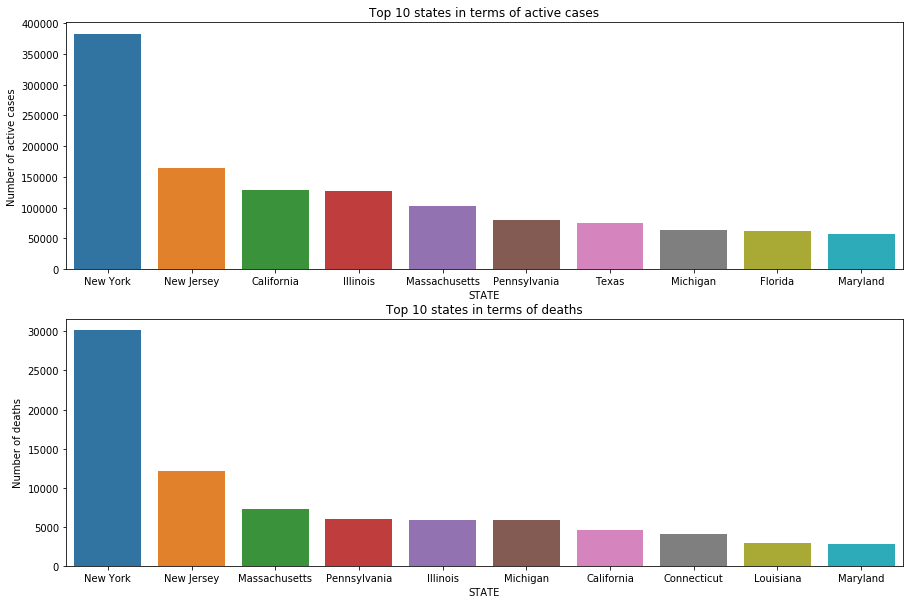

In [5]:
top10_states = final_date.groupby("state")

figure = plt.figure(figsize=(15, 10))

ax1 = figure.add_subplot(211)

sns.barplot(x=top10_states['cases'].sum().sort_values(ascending=False)[
            :10].index, y=top10_states['cases'].sum().sort_values(ascending=False)[:10], ax=ax1)
plt.title("Top 10 states in terms of active cases")
plt.xlabel("STATE")
plt.ylabel("Number of active cases")


ax2 = figure.add_subplot(212)
sns.barplot(x=top10_states['deaths'].sum().sort_values(ascending=False)[
            :10].index, y=top10_states['deaths'].sum().sort_values(ascending=False)[:10], ax=ax2)
plt.title("Top 10 states in terms of deaths")
plt.xlabel("STATE")
plt.ylabel("Number of deaths")

Number of active cases and deaths are in the state of NY. It is far more than the 2nd worst hit state i.e. New Jersey. <br>

Text(0, 0.5, 'Number of deaths')

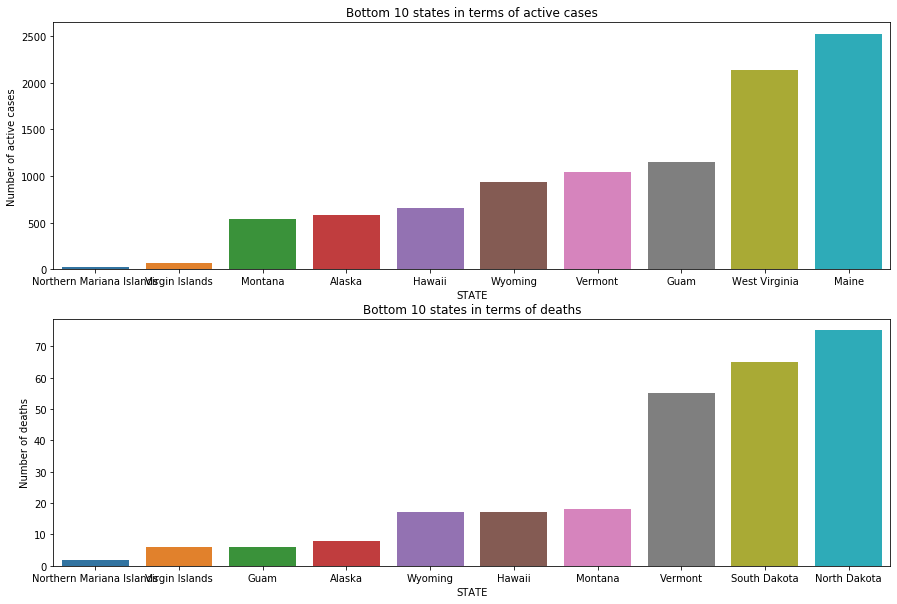

In [6]:
figure = plt.figure(figsize=(15, 10))

ax1 = figure.add_subplot(211)

sns.barplot(x=top10_states['cases'].sum().sort_values()[
            :10].index, y=top10_states['cases'].sum().sort_values()[:10], ax=ax1)
plt.title("Bottom 10 states in terms of active cases")
plt.xlabel("STATE")
plt.ylabel("Number of active cases")


ax2 = figure.add_subplot(212)
sns.barplot(x=top10_states['deaths'].sum().sort_values()[
            :10].index, y=top10_states['deaths'].sum().sort_values()[:10], ax=ax2)
plt.title("Bottom 10 states in terms of deaths")
plt.xlabel("STATE")
plt.ylabel("Number of deaths")

The states of Northern Mariana and Virgin Islands had less than 10 deaths

count        55.000000
mean      35167.290909
std       59529.122970
min          26.000000
25%        4967.000000
50%       15441.000000
75%       40354.000000
max      382102.000000
Name: cases, dtype: float64

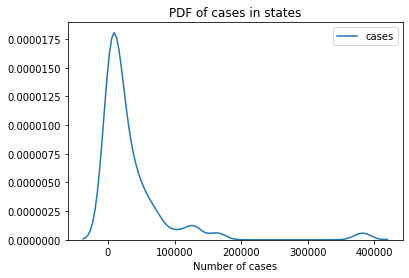

In [7]:
sns.kdeplot(top10_states['cases'].sum())
plt.title("PDF of cases in states")
plt.xlabel("Number of cases")
top10_states['cases'].sum().describe()

Average number of cases in a state = 35167 <br>
Median = 15441

## County wise analysis of Covid cases and deaths

Text(0, 0.5, 'Number of deaths')

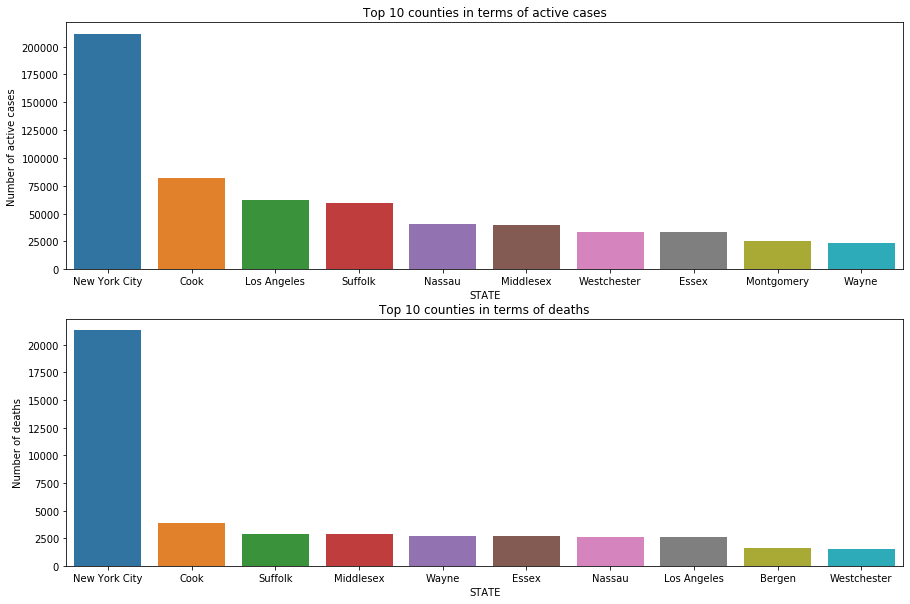

In [8]:
top10_counties = final_date.groupby("county")

figure = plt.figure(figsize=(15, 10))

ax1 = figure.add_subplot(211)

sns.barplot(x=top10_counties['cases'].sum().sort_values(ascending=False)[
            :10].index, y=top10_counties['cases'].sum().sort_values(ascending=False)[:10], ax=ax1)
plt.title("Top 10 counties in terms of active cases")
plt.xlabel("STATE")
plt.ylabel("Number of active cases")


ax2 = figure.add_subplot(212)
sns.barplot(x=top10_counties['deaths'].sum().sort_values(ascending=False)[
            :10].index, y=top10_counties['deaths'].sum().sort_values(ascending=False)[:10], ax=ax2)
plt.title("Top 10 counties in terms of deaths")
plt.xlabel("STATE")
plt.ylabel("Number of deaths")

The County of Cook was also hit hard in terms of cases and deaths but it is surpassed easily by NYC again

Text(0, 0.5, 'Number of deaths')

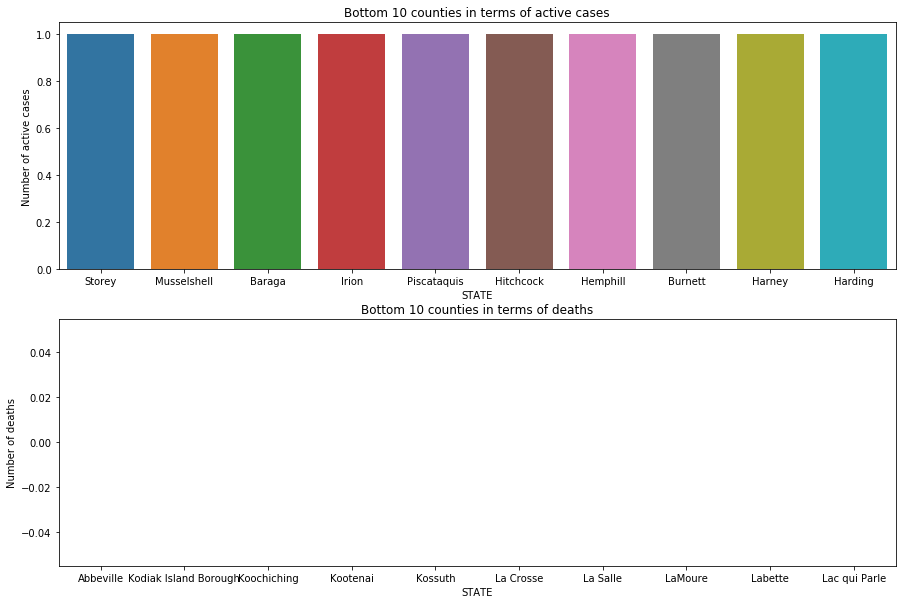

In [9]:
figure = plt.figure(figsize=(15,10))

ax1 = figure.add_subplot(211)

sns.barplot(x=top10_counties['cases'].sum().sort_values()[:10].index, y=top10_counties['cases'].sum().sort_values()[:10], ax=ax1)
plt.title("Bottom 10 counties in terms of active cases")
plt.xlabel("STATE")
plt.ylabel("Number of active cases")


ax2 = figure.add_subplot(212)
sns.barplot(x=top10_counties['deaths'].sum().sort_values()[:10].index, y=top10_counties['deaths'].sum().sort_values()[:10], ax=ax2)
plt.title("Bottom 10 counties in terms of deaths")
plt.xlabel("STATE")
plt.ylabel("Number of deaths")

Counties like Storey, Baraga etc have only reported 1 case up until now

count      1771.000000
mean       1092.151892
std        6410.705235
min           1.000000
25%          18.500000
50%          83.000000
75%         444.000000
max      211274.000000
Name: cases, dtype: float64

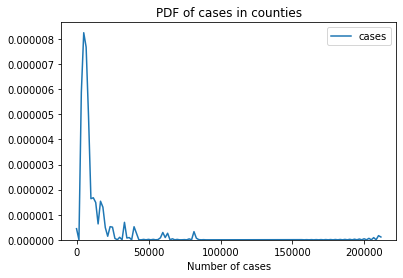

In [10]:
sns.kdeplot(top10_counties['cases'].sum())
plt.title("PDF of cases in counties")
plt.xlabel("Number of cases")
top10_counties['cases'].sum().describe()

On an average, each county has 1092 cases of COVID19. <br>
However, the median value suggests that most counties have 83 cases while some, like NYC have 211274 cases

# Weekly growth in highly affected states

Text(0, 0.5, 'Number of covid19 cases')

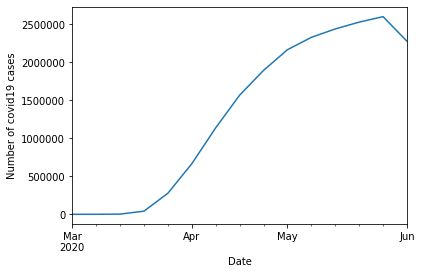

In [11]:
NYC = us_covid[us_covid.state=="New York"].resample("w")
NYC['cases'].sum().plot()
plt.xlabel("Date")
plt.ylabel("Number of covid19 cases")

As we can see, there has been an exponential growth in Covid-19 cases in NYC

Text(0, 0.5, 'Number of covid19 cases')

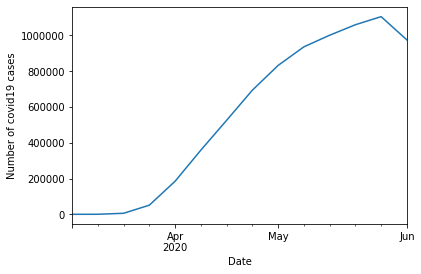

In [12]:
NJ = us_covid[us_covid.state=="New Jersey"].resample("w")
NJ['cases'].sum().plot()
plt.xlabel("Date")
plt.ylabel("Number of covid19 cases")

There has been a huge growth in Covid19 cases in New Jersey as well but the difference in scale of the y axis tells us how NYC has surpassed NJ

# Weekly growth in Highly affected Counties

Text(0, 0.5, 'Number of covid19 cases')

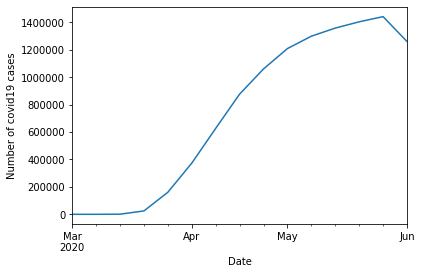

In [13]:
NYC = us_covid[us_covid.county=="New York City"].resample("w")
NYC['cases'].sum().plot()
plt.xlabel("Date")
plt.ylabel("Number of covid19 cases")

Text(0, 0.5, 'Number of covid19 cases')

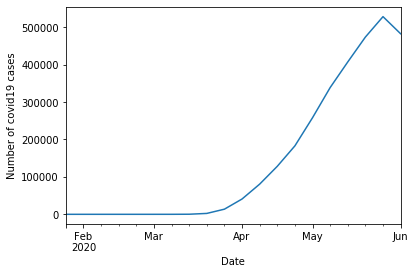

In [14]:
Cook = us_covid[us_covid.county=="Cook"].resample("w")
Cook['cases'].sum().plot()
plt.xlabel("Date")
plt.ylabel("Number of covid19 cases")

The sheer difference in scale shows how covid19 has devastated NYC 